<a href="https://colab.research.google.com/github/Sagnik220/Forest-Fire-Prediction/blob/main/ForestFire_PyCARET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install -q pycaret

     |████████████████████████████████| 256kB 7.1MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 81kB 5.9MB/s 
     |████████████████████████████████| 6.8MB 13.2MB/s 
     |████████████████████████████████| 61kB 6.8MB/s 
     |████████████████████████████████| 174kB 50.3MB/s 
     |████████████████████████████████| 2.0MB 41.7MB/s 
     |████████████████████████████████| 14.2MB 273kB/s 
     |████████████████████████████████| 112kB 39.6MB/s 
     |████████████████████████████████| 61kB 7.4MB/s 
     |████████████████████████████████| 10.1MB 34.0MB/s 
     |████████████████████████████████| 1.1MB 35.7MB/s 
     |████████████████████████████████| 645kB 35.8MB/s 
     |████████████████████████████████| 112kB 52.8MB/s 
     |████████████████████████████████| 3.1MB 32.9MB/s 
     |████████████████████████████████| 81kB 8.3MB/s 

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('/content/forestfires.csv')

In [4]:
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [6]:
data['area'].count

<bound method Series.count of 0       0.00
1       0.00
2       0.00
3       0.00
4       0.00
       ...  
512     6.44
513    54.29
514    11.16
515     0.00
516     0.00
Name: area, Length: 517, dtype: float64>

In [21]:
data=data.drop(['X','Y','month','day'],axis=1)

In [22]:
data.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


### Regression

In [23]:
from pycaret.regression import *
reg1 = setup(data = data, target = 'area')

,Description,Value
0,session_id,767
1,Target,area
2,Original Data,"(517, 9)"
3,Missing Values,False
4,Numeric Features,8
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(361, 8)"


In [24]:
best_model=compare_models(n_select=3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,14.9330,5775.5513,51.5948,-0.0967,1.4137,1.0282,0.043
br,Bayesian Ridge,22.1262,5640.2299,52.3419,-3.9629,2.1710,6.6082,0.018
llar,Lasso Least Angle Regression,22.1024,5641.0953,52.3341,-3.9956,2.1711,6.5625,0.013
omp,Orthogonal Matching Pursuit,22.9264,5606.0882,53.0576,-4.6008,2.1387,8.2239,0.013
par,Passive Aggressive Regressor,33.2102,6687.2869,62.5216,-5.4028,2.2684,10.6615,0.017
en,Elastic Net,23.5175,5660.0218,53.9036,-5.5115,2.1633,7.6922,0.014
lasso,Lasso Regression,23.5442,5662.3945,53.9399,-5.6200,2.1648,7.7291,0.013
ridge,Ridge Regression,23.9268,5681.4428,54.3661,-6.0723,2.1776,7.9900,0.012
lar,Least Angle Regression,24.0083,5696.1420,54.5872,-6.0939,2.1794,8.0042,0.016
lr,Linear Regression,24.0083,5696.1419,54.5872,-6.0939,2.1794,8.0042,0.308


In [25]:
print(best_model)

[HuberRegressor(alpha=0.0001, epsilon=1.35, fit_intercept=True, max_iter=100,
               tol=1e-05, warm_start=False), BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False), LassoLars(alpha=1.0, copy_X=True, eps=2.220446049250313e-16, fit_intercept=True,
          fit_path=True, jitter=None, max_iter=500, normalize=True,
          positive=False, precompute='auto', random_state=767, verbose=False)]


In [26]:
huber_model=create_model('huber', fold = 20)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,14.2551,2126.9363,46.1187,-0.0792,1.4566,0.6568
1,7.5434,163.9068,12.8026,-0.2469,1.3378,0.9563
2,9.6375,659.9386,25.6893,-0.1059,1.3749,0.5885
3,4.7094,68.7168,8.2896,-0.1016,1.1770,0.9225
4,13.0405,1061.1431,32.5752,-0.1197,1.4974,0.6530
5,5.3678,115.1296,10.7298,-0.1271,1.2248,0.7314
6,76.3897,68412.9342,261.5587,-0.0881,2.0335,0.6082
7,8.0693,196.5693,14.0203,-0.2549,1.3494,1.4799
8,3.0700,37.5692,6.1294,-0.0557,0.9315,1.3182
9,6.8765,226.5815,15.0526,-0.0897,1.3252,0.7812


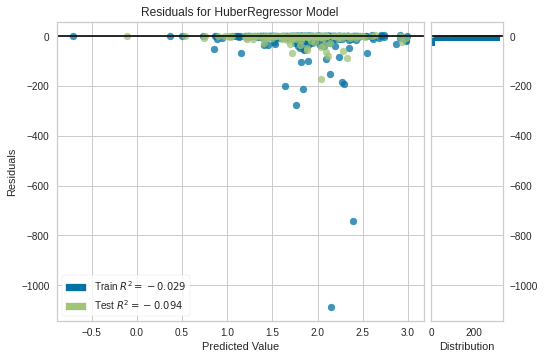

In [28]:
plot_model(huber_model)

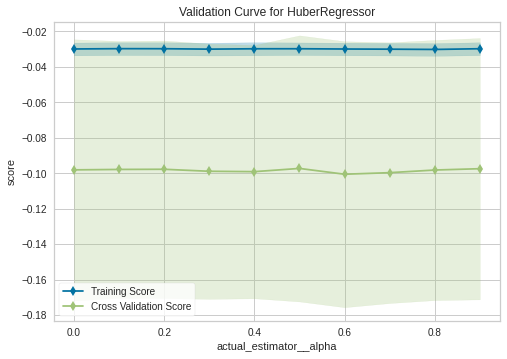

In [29]:
plot_model(huber_model,'vc')

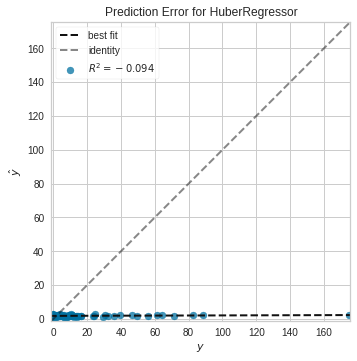

In [30]:
plot_model(huber_model,'error')

### Classification

In [43]:
def preprocessing(df):
  df=df.copy()
  df['area']=df['area'].apply(lambda x: 1 if x>0 else 0)

  return df

In [44]:
df=preprocessing(data)

In [45]:
df

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0
...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,1
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,1
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,1
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0


In [50]:
from pycaret.classification import *
reg2 = setup(data = df, target = 'area')

,Description,Value
0,session_id,4804
1,Target,area
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(517, 9)"
5,Missing Values,False
6,Numeric Features,8
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [52]:
best_model=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.5763,0.5924,0.5703,0.5718,0.5689,0.1532,0.1539,0.111
knn,K Neighbors Classifier,0.5679,0.5727,0.5307,0.5713,0.5480,0.1357,0.1370,0.116
et,Extra Trees Classifier,0.5596,0.5737,0.5464,0.5572,0.5490,0.1186,0.1198,0.468
rf,Random Forest Classifier,0.5456,0.5646,0.5467,0.5392,0.5381,0.0908,0.0921,0.514
dt,Decision Tree Classifier,0.5349,0.5340,0.5363,0.5247,0.5254,0.0702,0.0716,0.020
lr,Logistic Regression,0.5295,0.5324,0.5810,0.5269,0.5483,0.0600,0.0596,0.060
gbc,Gradient Boosting Classifier,0.5264,0.5509,0.5029,0.5221,0.5100,0.0523,0.0532,0.098
lightgbm,Light Gradient Boosting Machine,0.5236,0.5377,0.5252,0.5187,0.5185,0.0477,0.0484,0.036
nb,Naive Bayes,0.5152,0.5871,0.9552,0.5057,0.6610,0.0369,0.0924,0.019
ridge,Ridge Classifier,0.5074,0.0000,0.5699,0.5008,0.5302,0.0156,0.0141,0.013


In [53]:
print(best_model)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=4804)


In [68]:
adaboost_model=create_model('ada', fold = 20)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5263,0.4556,0.4444,0.5000,0.4706,0.0447,0.0449
1,0.5556,0.5432,0.4444,0.5714,0.5000,0.1111,0.1140
2,0.5000,0.5432,0.4444,0.5000,0.4706,0.0000,0.0000
3,0.6111,0.7160,0.6667,0.6000,0.6316,0.2222,0.2236
4,0.6111,0.6914,0.6667,0.6000,0.6316,0.2222,0.2236
5,0.5556,0.7407,0.7778,0.5385,0.6364,0.1111,0.1240
6,0.5556,0.4815,0.5556,0.5556,0.5556,0.1111,0.1111
7,0.5000,0.4506,0.5556,0.5000,0.5263,0.0000,0.0000
8,0.3333,0.4136,0.2222,0.2857,0.2500,-0.3333,-0.3419
9,0.5000,0.5802,0.5556,0.5000,0.5263,0.0000,0.0000


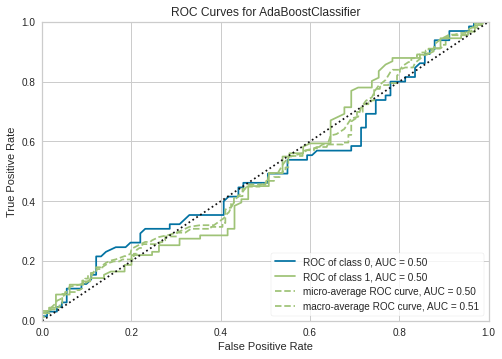

In [69]:
plot_model(adaboost_model)

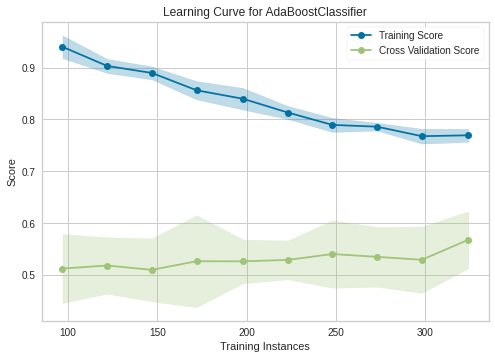

In [70]:
plot_model(adaboost_model,'learning')

In [71]:
tuned_adaboost=tune_model(adaboost_model,optimize='Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.4865,0.4678,0.6111,0.4783,0.5366,-0.0203,-0.0211
1,0.5556,0.6173,0.5556,0.5556,0.5556,0.1111,0.1111
2,0.6111,0.6883,0.5000,0.6429,0.5625,0.2222,0.2279
3,0.5556,0.5185,0.5000,0.5625,0.5294,0.1111,0.1118
4,0.4444,0.5154,0.4444,0.4444,0.4444,-0.1111,-0.1111
5,0.4722,0.4660,0.1667,0.4286,0.2400,-0.0556,-0.0702
6,0.6389,0.7037,0.6111,0.6471,0.6286,0.2778,0.2782
7,0.6667,0.6497,0.6667,0.6667,0.6667,0.3333,0.3333
8,0.6667,0.6698,0.6667,0.6667,0.6667,0.3333,0.3333
9,0.5556,0.6300,0.7647,0.5200,0.6190,0.1299,0.1443


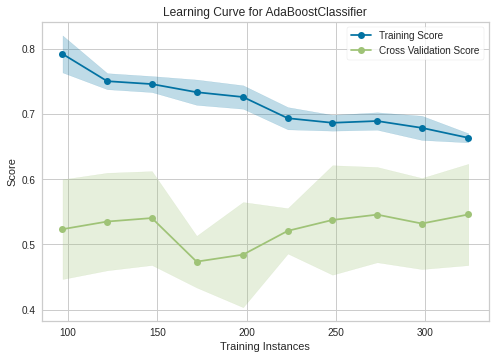

In [73]:
plot_model(tuned_adaboost,'learning')

In [74]:
save_model(tuned_adaboost,'forestfiremodel')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='area',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strateg...
                 ('dummy', Dummify(target='area')),
                 ('fix_perfect', Remove_100(target='area')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs',